# Exploratory Data Analysis

## 1) First do Data Featuring Part - Go and handle the missing values <br>
## 2) Must expertis on Numpy, Seaborn, Pandas & Matplotlib  <br>
## 3) How to handle categorical data
## 4) Feature Selection

# EDA with Python and applying Logistic Regression 

For this lecture we will be working with the "Titanic data set from kaggle". This is a very famous data set and very often is a student's first step in machine learning

We will be trying to predict a classification - survival or deceased. Let's begin our understanding of implementing Logistic Regression in python for classification.

We will use a semi-cleaned version of the titanic data set, if you use the dataset hosted directly on kaggle, you may need to do some additional cleaning. Not show in this lecture

## Important Libraries 

Let's import some libraries to get started!

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
df = pd.read_html('https://github.com/krishnaik06/EDA1/blob/master/titanic_train.csv')
df=df[0]

In [25]:
df.head()
df.drop(df['Unnamed:0'])

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,NaN,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,NaN,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,NaN,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,NaN,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
df.drop('Unnamed: 0',axis=1,inplace=True)

## Missing Data Information & Give visualization to dataset

In [41]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
df.isnull().sum()

Unnamed: 0     891
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

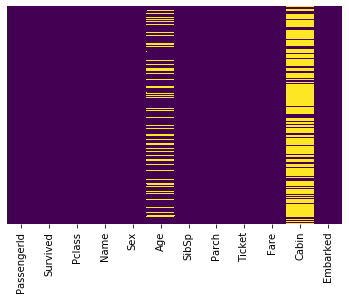

In [48]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

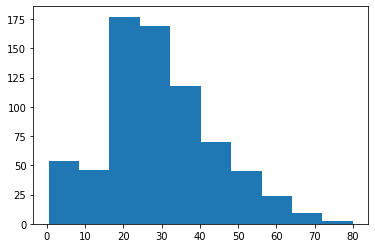

In [34]:
plt.hist(df['Age'])
plt.show()

In [32]:
df.loc[df['Age'].isnull()].count()['PassengerId']

177

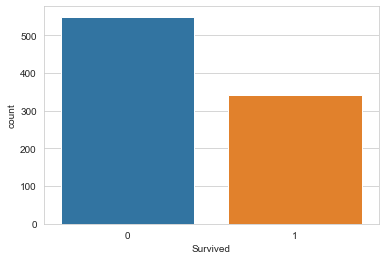

In [52]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

#Visualizing how many survivied in Titanic accident. 0 - NOt survivied,1 - Survived

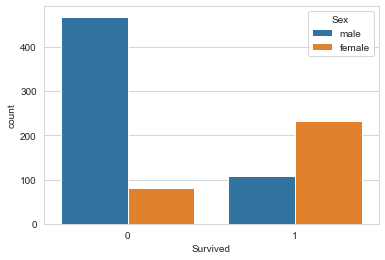

In [54]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,hue='Sex')

#Visualizing how many survivied in Titanic accident. 0 - NOt survivied,1 - Survived (Differenciated with Sex category)

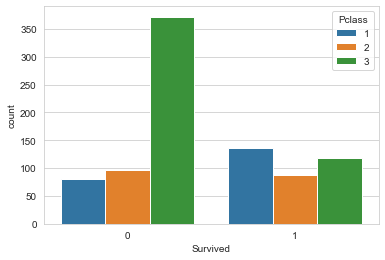

In [57]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,hue='Pclass')

#Visualizing how many survivied in Titanic accident. 0-NOt survivied,1-Survived (Differenciated with Passenger class category)
#Seems more passengers died from 1st class.

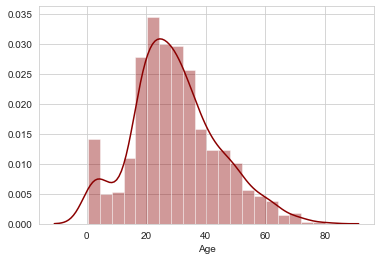

In [64]:
sns.distplot(df['Age'].dropna(),kde=True,color='darkred')

#Seems people who died are between age 20-35

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

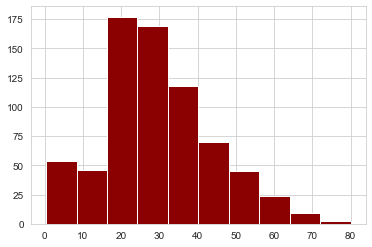

In [68]:
plt.hist(df['Age'],color='darkred')

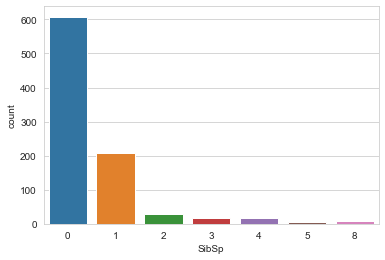

In [71]:
sns.countplot(x='SibSp',data=df)

In [72]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


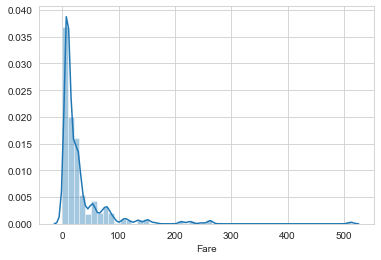

In [75]:
sns.distplot(df['Fare'])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

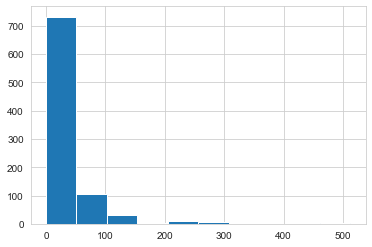

In [76]:
plt.hist(df['Fare'])

# Data Cleansing

We want to fill in missing aga data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the avergage age by passenger class. For example

In [83]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


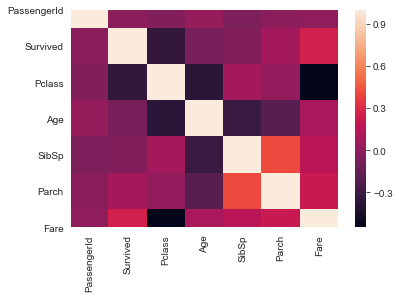

In [84]:
sns.heatmap(df.corr())

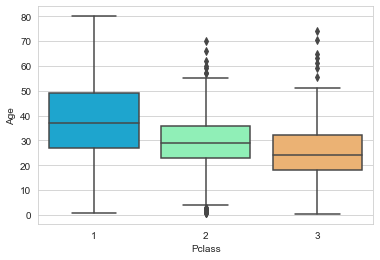

In [82]:
sns.boxplot(x='Pclass',y='Age',data=df,palette='rainbow')

We can see Age of class1 passengers are high followed by class2 & class3 Passengers. This means wealthier passenger are of more Age.... And poorer passengers are of younger age.

In [87]:
df.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [91]:
df.loc[(df['Pclass']==1) & (df['Age'].isnull()) ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,A32,S
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C
270,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S
295,296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C


In [99]:
a = df.loc[df['Pclass']==1].mean()["Age"]
b = df.loc[df['Pclass']==2].mean()["Age"]
c = df.loc[df['Pclass']==3].mean()["Age"]
print(a)
print(b)
print(c)

38.233440860215055
29.87763005780347
25.14061971830986


In [100]:
df.loc[(df['Pclass']==1) & (df['Age'].isnull()),'Age'] = a

In [104]:
df.loc[(df['Pclass']==1) & (df['Age']==a)]

PassengerId    30
Survived       30
Pclass         30
Name           30
Sex            30
Age            30
SibSp          30
Parch          30
Ticket         30
Fare           30
Cabin          16
Embarked       30
dtype: int64

In [110]:
df.loc[(df['Pclass']==2) & (df['Age'].isnull()),'Age'] = b

PassengerId    11
Survived       11
Pclass         11
Name           11
Sex            11
Age            11
SibSp          11
Parch          11
Ticket         11
Fare           11
Cabin           1
Embarked       11
dtype: int64

In [108]:
df.loc[(df['Pclass']==3) & (df['Age'].isnull()),'Age'] = c

In [111]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [112]:
#Other way to impute data as follows
def impute_age(cols):
    Age= cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return a
        if Pclass==2:
            return b
        if Pclass==3:
            return c
    else:
        return Age
    
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [113]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

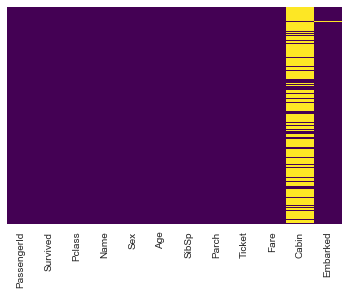

In [114]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Droping Cabin & Embarked column - As there are so much Nan values 

In [115]:
df.drop('Cabin',axis=1,inplace=True)  #Removing Cabin column from the dataset

In [117]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [121]:
df.dropna(how='any',axis=0,inplace=True)

In [122]:
df.shape

(889, 11)

# Converting Categorical Features 

We will need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [125]:
df['Embarked'].value_counts()   #We will change two categorical column into ordenal form

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [126]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [128]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embarked = pd.get_dummies(df['Embarked'],drop_first=True)

In [133]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [134]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [136]:
df=pd.concat([df,sex,embarked],axis=1)

In [137]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
